Задание 2

НАЗВАНИЕ ИССЛЕДОВАНИЕ ДАННЫХ

[Условие](https://yielding-plywood-876.notion.site/9ce8fd4a65c648248ac1cfcf03f3f051?pvs=4)

ОПИСАНИЕ

 По ссылке лежит датасет. Нужно познакомиться с данными, понять что там лежит, отрисовать графики, провести исследование по тому что видишь. Любые фичи на твой вкус можешь использовать (если вдруг решишь МЛ - оно должно быть обоснованно, но это явно будет тут лишним). Предоставить полноценный ресерч в тетрадке ipynb в открытом GitHub’e и дать ссылку. Там же можешь делать описание (через Markdown) и в заключении обязательно вывод по исследованным данным (только без воды, пожалуйста).

Образ результата: небольшое ресерч, загруженный в гит.


Загружаем данные

In [2]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt

with gzip.open('example_data.gz') as f:
    df = pd.read_csv(f, sep=',', header=0, parse_dates=['timestamp'])

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040171 entries, 0 to 1040170
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1040171 non-null  object        
 1   timestamp  1040171 non-null  datetime64[ns]
 2   event      1040171 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 23.8+ MB


,user_id,timestamp,event
0,148870bfa84777898359aaa8e120a373,2021-01-01 00:00:01.000000000,landing
1,ac3948ea43cb39cdc4e739004d252d0b,2021-01-01 00:00:01.445020335,landing
2,48a0df50d7ed1fcaaddf742b828b85e5,2021-01-01 00:00:10.566157670,login
3,70fbdd335abb11a3d072b5de7b218048,2021-01-01 00:00:10.764937005,main
4,48a0df50d7ed1fcaaddf742b828b85e5,2021-01-01 00:00:10.764937005,login


In [6]:
old_reg_users = df.query('event == "registration"')['user_id'].unique()
print("Количество обыных регистраций: ", df.query('event == "registration"')['user_id'].shape[0])
print("Количество обыных уникальных (по пользователю) регистраций: ", old_reg_users.shape[0])

Количество обыных регистраций:  51943
Количество обыных уникальных (по пользователю) регистраций:  24078


In [7]:
new_reg_users = df.query('event == "registration_new"')['user_id'].unique()
print("Количество новых регистраций: ", df.query('event == "registration_new"')['user_id'].shape[0])
print("Количество новых уникальных (по пользователю) регистраций: ", new_reg_users.shape[0])

Количество новых регистраций:  5621
Количество новых уникальных (по пользователю) регистраций:  2540


Каждый зарегестрировавшийся пользователь посетил регистрацию в среднем 2 раза.

In [8]:
df['time_diff'] = df.groupby('user_id')['timestamp'].diff().fillna(pd.Timedelta(seconds=0))
df['session_id'] = (df['time_diff'] > pd.Timedelta("15 minutes")) | (df['time_diff'].isnull())
df['session_id'] = df.groupby('user_id')['session_id'].cumsum()
df

,user_id,timestamp,event,time_diff,session_id
0,148870bfa84777898359aaa8e120a373,2021-01-01 00:00:01.000000000,landing,0 days 00:00:00,0
1,ac3948ea43cb39cdc4e739004d252d0b,2021-01-01 00:00:01.445020335,landing,0 days 00:00:00,0
2,48a0df50d7ed1fcaaddf742b828b85e5,2021-01-01 00:00:10.566157670,login,0 days 00:00:00,0
3,70fbdd335abb11a3d072b5de7b218048,2021-01-01 00:00:10.764937005,main,0 days 00:00:00,0
4,48a0df50d7ed1fcaaddf742b828b85e5,2021-01-01 00:00:10.764937005,login,0 days 00:00:00.198779335,0
...,...,...,...,...,...
1040166,a63250880822c619ecbbf9fa511d31cd,2021-04-07 13:20:16.775249492,login,0 days 00:42:16.109561654,1
1040167,7fa83873bead5c5a52d6805570aba31d,2021-04-07 13:20:18.688737570,registration,0 days 00:00:00,0
1040168,1d716213d6f611f80592391ac61b5a5c,2021-04-07 13:20:18.688737570,main,0 days 00:29:32.297845625,1
1040169,7fa83873bead5c5a52d6805570aba31d,2021-04-07 13:20:22.134689896,registration,0 days 00:00:03.445952326,0


(array([1.017843e+06, 1.126000e+04, 3.412000e+03, 2.149000e+03,
        1.220000e+03, 1.363000e+03, 9.120000e+02, 8.490000e+02,
        6.750000e+02, 4.880000e+02]),
 array([   0. ,  123.8,  247.6,  371.4,  495.2,  619. ,  742.8,  866.6,
         990.4, 1114.2, 1238. ]),
 <BarContainer object of 10 artists>)

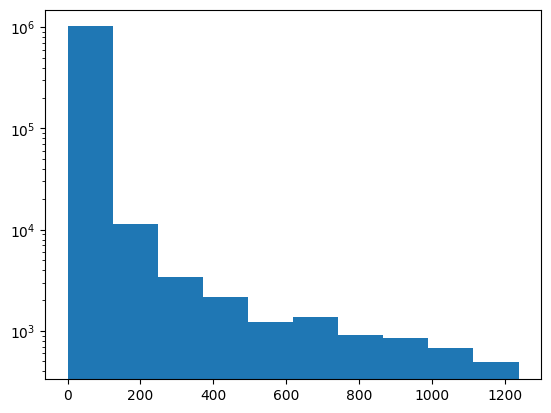

In [9]:
plt.hist(df['session_id'], log=True)

In [10]:
grouped = df.groupby('user_id')
reg_users = grouped['event'].apply(lambda x: "new" if 'registration_new' in x.values else "old" if "registration" in x.values else "no_reg")
df['reg_type'] = df['user_id'].map(reg_users)
df

,user_id,timestamp,event,time_diff,session_id,reg_type
0,148870bfa84777898359aaa8e120a373,2021-01-01 00:00:01.000000000,landing,0 days 00:00:00,0,no_reg
1,ac3948ea43cb39cdc4e739004d252d0b,2021-01-01 00:00:01.445020335,landing,0 days 00:00:00,0,no_reg
2,48a0df50d7ed1fcaaddf742b828b85e5,2021-01-01 00:00:10.566157670,login,0 days 00:00:00,0,no_reg
3,70fbdd335abb11a3d072b5de7b218048,2021-01-01 00:00:10.764937005,main,0 days 00:00:00,0,no_reg
4,48a0df50d7ed1fcaaddf742b828b85e5,2021-01-01 00:00:10.764937005,login,0 days 00:00:00.198779335,0,no_reg
...,...,...,...,...,...,...
1040166,a63250880822c619ecbbf9fa511d31cd,2021-04-07 13:20:16.775249492,login,0 days 00:42:16.109561654,1,no_reg
1040167,7fa83873bead5c5a52d6805570aba31d,2021-04-07 13:20:18.688737570,registration,0 days 00:00:00,0,old
1040168,1d716213d6f611f80592391ac61b5a5c,2021-04-07 13:20:18.688737570,main,0 days 00:29:32.297845625,1,no_reg
1040169,7fa83873bead5c5a52d6805570aba31d,2021-04-07 13:20:22.134689896,registration,0 days 00:00:03.445952326,0,old


Построим гистограмму по количеству сессий в зависимости от вида регистрации.

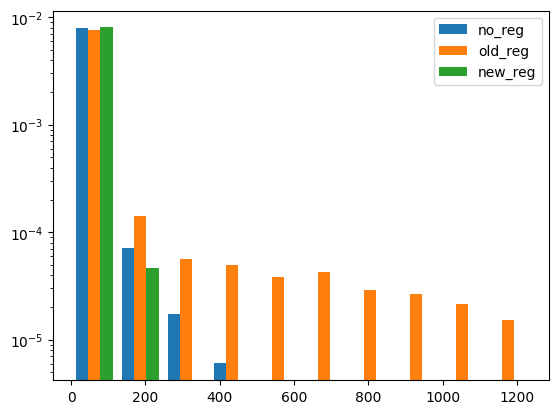

In [11]:
plt.hist([df.query('reg_type == "no_reg"')['session_id'],
          df.query('reg_type == "old"')['session_id'],
          df.query('reg_type == "new"')['session_id']],
          log=True, density=True, label = ["no_reg", "old_reg", "new_reg"])
plt.legend()

Данный график говорит о том, что пользователи зарегистровавшиеся на старой форме более "преданы" сайту и заходят очень часто (создают много сессий). А пользователи зарегестрировавшиеся на новой форме заходят чуть чаще, зарегестрированных до наблюдения.

Построим графики проведенного времени на сайте.

In [12]:
session_lengths = df.groupby(['session_id', 'user_id'])['timestamp'].apply(lambda x: x.max() - x.min())
session_lengths = session_lengths.rename('session_length')
session_lengths = df[['user_id', 'session_id', 'reg_type']].drop_duplicates().merge(session_lengths, how="right", left_on=['session_id', 'user_id'], right_on=['session_id', 'user_id'])
session_lengths

,user_id,session_id,reg_type,session_length
0,00006e145e005308c5387dfbb3c9a490,0,no_reg,0 days 00:00:00
1,00008aab9f1597af45ad21aa141030aa,0,old,0 days 00:00:00
2,0000920f448655f105fa592fc22029c2,0,no_reg,0 days 00:00:00
3,000095d3c9d93db2db0327d7a1329e2d,0,old,0 days 00:00:43.958355428
4,0000a840f208e41830a588db4745d128,0,no_reg,0 days 00:00:18.982517845
...,...,...,...,...
481200,c9be7da3b5c975cc2795f15d45f0390a,1234,old,0 days 00:00:26.750407820
481201,c9be7da3b5c975cc2795f15d45f0390a,1235,old,0 days 00:00:51.965307535
481202,c9be7da3b5c975cc2795f15d45f0390a,1236,old,0 days 00:00:17.398921463
481203,c9be7da3b5c975cc2795f15d45f0390a,1237,old,0 days 00:14:33.693930497


Построим box plot по времени сессий.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2776c7a320>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2775422bc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2776c79870>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2775423a60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f277f5404f0>,
 'means': []}

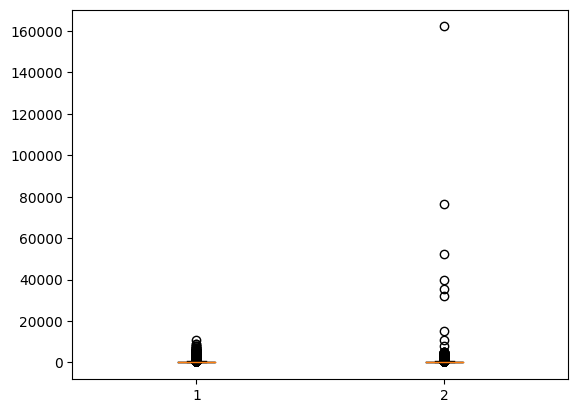

In [13]:
plt.boxplot([session_lengths.query('reg_type == "old"')['session_length'].map(pd.Timedelta.total_seconds),
          session_lengths.query('reg_type == "new"')['session_length'].map(pd.Timedelta.total_seconds)])

Как видно большенство сессий длится очень мало, поэтому лучше построить логорифмичесую зависимость. Также видно, что зарегестрировавшиеся на новой форме имеют несколько слишком больших выбросов, удалим их.

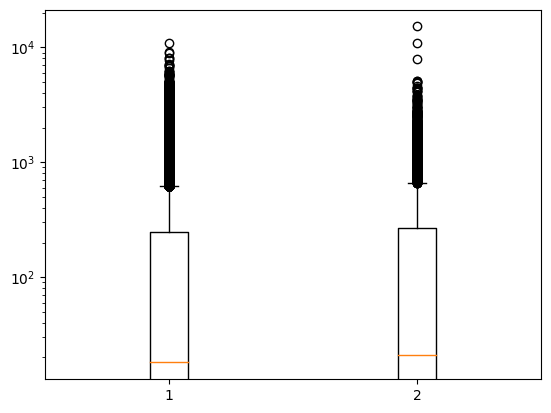

In [14]:
plt.boxplot([session_lengths.query('reg_type == "old"')['session_length'].map(pd.Timedelta.total_seconds),
          session_lengths.query('reg_type == "new"')['session_length'].map(pd.Timedelta.total_seconds)[
              session_lengths.query('reg_type == "new"')['session_length'].map(pd.Timedelta.total_seconds) < 20000]])
plt.yscale('log')

Построим гистограмму с теми же данными.

(array([[6.40752974e-04, 1.56184626e-05, 1.80578574e-06, 3.64325193e-07,
         7.12810161e-08, 3.16804516e-08, 7.92011290e-09, 7.92011290e-09,
         0.00000000e+00, 0.00000000e+00],
        [6.36208762e-04, 1.94741362e-05, 2.25320584e-06, 4.82829822e-07,
         0.00000000e+00, 8.04716370e-08, 0.00000000e+00, 8.04716370e-08,
         0.00000000e+00, 8.04716370e-08]]),
 array([    0.       ,  1518.2331854,  3036.4663708,  4554.6995562,
         6072.9327416,  7591.165927 ,  9109.3991124, 10627.6322978,
        12145.8654832, 13664.0986686, 15182.331854 ]),
 <a list of 2 BarContainer objects>)

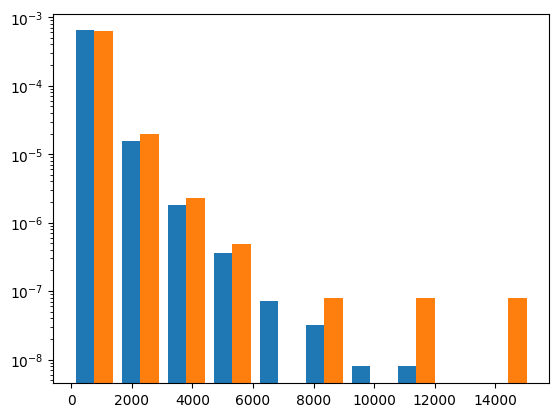

In [15]:
plt.hist([session_lengths.query('reg_type == "old"')['session_length'].map(pd.Timedelta.total_seconds),
          session_lengths.query('reg_type == "new"')['session_length'].map(pd.Timedelta.total_seconds)[
              session_lengths.query('reg_type == "new"')['session_length'].map(pd.Timedelta.total_seconds) < 20000]],
         log=True, density=True, label = ["old_reg", "new_reg"])
plt.legend()

Проверим насколько влияют время и регистрация на длительность сессий.

In [60]:
import datetime as dt
import statsmodels.api as sm

In [75]:
Y = session_lengths['session_length'].map(pd.Timedelta.total_seconds)
X = pd.get_dummies(session_lengths['reg_type'],drop_first=False)
X = pd.concat([df.groupby(['session_id', 'user_id'])['timestamp'].min().map(dt.datetime.toordinal).reset_index(), X], axis=1).drop(['session_id', 'user_id'], axis=1)
X

,timestamp,new,no_reg,old
0,737798,0,1,0
1,737838,0,0,1
2,737811,0,1,0
3,737832,0,0,1
4,737867,0,1,0
...,...,...,...,...
481200,737887,0,0,1
481201,737887,0,0,1
481202,737887,0,0,1
481203,737887,0,0,1


In [76]:
X2 = sm.add_constant(X).drop(['no_reg'], axis=1)
model1 = sm.OLS(Y, X2)
fit1 = model1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:         session_length   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3587.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:41:59   Log-Likelihood:            -3.5907e+06
No. Observations:              481205   AIC:                         7.181e+06
Df Residuals:                  481201   BIC:                         7.182e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.632e+04   1.66e+04      2.186      0.0

Как видно из результатов линейной регрессии полизователи без регисрации значимо (p-value -> 0) отличаются от тех что регистрировались в период наблюдений. А время когда они регисрировались незначимо отличается от 0, его можно убрать. Построим следующую модель.

In [96]:
X3 = sm.add_constant(X).drop(['timestamp', 'no_reg'], axis=1)
model2 = sm.OLS(Y, X3)
fit2 = model2.fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:         session_length   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     5378.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:54:00   Log-Likelihood:            -3.5907e+06
No. Observations:              481205   AIC:                         7.181e+06
Df Residuals:                  481202   BIC:                         7.182e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7051      0.675    118.162      0.0

В этой модели R^2 не изменился, следовательно, дата и время регистрации не оказывает значимого влияния на продолжительность сессии. Теперь уберём пользователей, которые зарегистрировалтсь раньше начала наблюдений и сравним как новая регистрация повлияла на продолжительность сессий.

In [97]:
X4 = sm.add_constant(X).drop(X[X.no_reg == 1].index, axis=0).drop(['timestamp', 'no_reg', 'old'], axis=1)
Y4 = Y.drop(X[X.no_reg == 1].index, axis=0)

model3 = sm.OLS(Y4, X4)
fit3 = model3.fit()
print(fit3.summary())

                            OLS Regression Results                            
Dep. Variable:         session_length   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     52.27
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           4.87e-13
Time:                        04:54:20   Log-Likelihood:            -7.4130e+05
No. Observations:               91354   AIC:                         1.483e+06
Df Residuals:                   91352   BIC:                         1.483e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.7519      2.805     82.983      0.0

В модели пользователи с новой регистрацией значимо отличаются от пользователей сос старой. Но R-squared = 0.001, то есть невозможно определить среднее время сессии пользователя, зная только как он регистрировался. Возможно это из-за выбросов, удалим их.

Проверим длительность регистрации, то есть время, между последней (т. к. каждый зарегестрировавшийся пользователь посетил регистрацию в среднем 2 раза.) регистрацией и его следующим действием.

In [143]:
df['time_to_next_action'] = df.groupby('user_id')['timestamp'].diff(periods=-1).fillna(pd.Timedelta(seconds=0)).map(pd.Timedelta.total_seconds)
df

,user_id,timestamp,event,time_diff,session_id,reg_type,time_to_next_action
0,148870bfa84777898359aaa8e120a373,2021-01-01 00:00:01.000000000,landing,0 days 00:00:00,0,no_reg,0.000000
1,ac3948ea43cb39cdc4e739004d252d0b,2021-01-01 00:00:01.445020335,landing,0 days 00:00:00,0,no_reg,0.000000
2,48a0df50d7ed1fcaaddf742b828b85e5,2021-01-01 00:00:10.566157670,login,0 days 00:00:00,0,no_reg,-0.198780
3,70fbdd335abb11a3d072b5de7b218048,2021-01-01 00:00:10.764937005,main,0 days 00:00:00,0,no_reg,-15.992627
4,48a0df50d7ed1fcaaddf742b828b85e5,2021-01-01 00:00:10.764937005,login,0 days 00:00:00.198779335,0,no_reg,-19.346571
...,...,...,...,...,...,...,...
1040166,a63250880822c619ecbbf9fa511d31cd,2021-04-07 13:20:16.775249492,login,0 days 00:42:16.109561654,1,no_reg,0.000000
1040167,7fa83873bead5c5a52d6805570aba31d,2021-04-07 13:20:18.688737570,registration,0 days 00:00:00,0,old,-3.445953
1040168,1d716213d6f611f80592391ac61b5a5c,2021-04-07 13:20:18.688737570,main,0 days 00:29:32.297845625,1,no_reg,0.000000
1040169,7fa83873bead5c5a52d6805570aba31d,2021-04-07 13:20:22.134689896,registration,0 days 00:00:03.445952326,0,old,0.000000


In [175]:
reg_time = df[df.event.isin(["registration", "registration_new"])].groupby('user_id').last().reset_index()[['reg_type', 'time_to_next_action']]
X5 = sm.add_constant(pd.get_dummies(reg_time['reg_type'])).drop(['old'], axis=1)
Y5 = -reg_time[['time_to_next_action']]

model4 = sm.OLS(Y5, X5)
fit4 = model4.fit()
print(fit4.summary())

                             OLS Regression Results                            
Dep. Variable:     time_to_next_action   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     4.245
Date:                 Sat, 08 Jul 2023   Prob (F-statistic):             0.0394
Time:                         06:04:14   Log-Likelihood:            -3.7680e+05
No. Observations:                26618   AIC:                         7.536e+05
Df Residuals:                    26616   BIC:                         7.536e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.09e+04   2191.778     18.66

Как видно из результатов на новую регистрацию пользователи тратя значимо больше времени. В выборке пользователи, которые зарегестрировалтсь и больше никогда не заходили на сайт имеют время 0, что может сильно поменять результаты. Исправим это.

In [226]:
print("Доля людей которые после старой регистрации бросили сайт: ",
 (reg_time.query('reg_type == "old"')['time_to_next_action'] == 0).sum() / reg_time.query('reg_type == "old"').count()[0])
print("Доля людей которые после новой регистрации бросили сайт: ",
 (reg_time.query('reg_type == "new"')['time_to_next_action'] == 0).sum() / reg_time.query('reg_type == "new"').count()[0])

Доля людей которые после старой регистрации бросили сайт:  0.4812692084060138
Доля людей которые после новой регистрации бросили сайт:  0.4346456692913386


Проверим значимость этих результатов.

In [233]:
from scipy.stats import fisher_exact

fisher_exact([[(reg_time.query('reg_type == "old"')['time_to_next_action'] == 0).sum(), (reg_time.query('reg_type == "old"')['time_to_next_action'] != 0).sum()],
 [(reg_time.query('reg_type == "new"')['time_to_next_action'] == 0).sum(), (reg_time.query('reg_type == "new"')['time_to_next_action'] != 0).sum()]])

SignificanceResult(statistic=1.2067891994755224, pvalue=7.77355814536001e-06)

P-value -> 0, следовательно есть значимое различие в покидании сайта после страницы регистрации.

In [191]:
X6 = X5.drop(Y5[Y5.time_to_next_action == 0].index, axis=0)
Y6 = Y5.drop(Y5[Y5.time_to_next_action == 0].index, axis=0)

model5 = sm.OLS(Y6, X6)
fit5 = model5.fit()
print(fit5.summary())

                             OLS Regression Results                            
Dep. Variable:     time_to_next_action   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     2.213
Date:                 Sat, 08 Jul 2023   Prob (F-statistic):              0.137
Time:                         06:12:10   Log-Likelihood:            -2.0155e+05
No. Observations:                13926   AIC:                         4.031e+05
Df Residuals:                    13924   BIC:                         4.031e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.884e+04   4177.659     18.87

Теперь точно можно сказать, что пользователи с новой регистрацией тратят незначимо (p-value = 0.137) больше времени. Построим график.

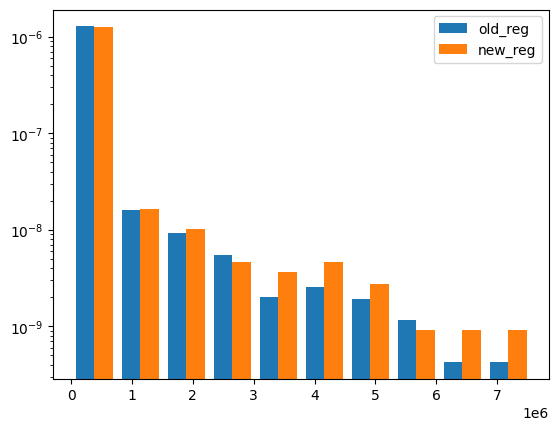

In [209]:
reg_time_no_zeros = pd.concat([X6[['new']], Y6], axis=1)

plt.hist([reg_time_no_zeros.query('new == 0')['time_to_next_action'],
          reg_time_no_zeros.query('new == 1')['time_to_next_action']],
          log=True, density=True, label = ["old_reg", "new_reg"])
plt.legend()

Из графика видно, что пользователи регистрируются одинаково и только у небольшой части людей возникают сложности (для людей с новой регисрацией их больше).

Вывод: новая регистрация отталкивает меньше людей (43.5% вместо 48.1% и это значимо pvalue = 7e-6), но вместе с тем, меньшиство, котрое медленно регистрировалось стало регистрироваться ещё медленее (но не статистически значимо p-value = 0.137).

Пользователи увидившие новую регистрацию проводили в среднем большие сессии по времени (и это значимо p-value -> 0).